# **Retail Store Inventory Dataset Analysis Using Pandas** -- (Undergoing...)


---



Dataset's Kaggle link: https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset

Steps to get a dataset from Kaggle into Colab ([YouTube demo link](https://https://www.youtube.com/watch?v=s9O6soJES74))

1. Login to Kaggle account.
2. Go to **Settings**.
3. Scroll down to find section called **'API'.**
4. Once there, click the button **'Create New Token'**.
5. A *.json* file containing the API key is saved locallly.
6. Open that file in notepad (or any text editor) and note the values for **'username'** and **'key'**.
7. Follow the steps below.

## **Downloading the dataset from Kaggle**

In [ ]:
!pip install opendatasets > /dev/null  # '> /dev/null' hides the long output, though the package is installed successfully

In [ ]:
import opendatasets as od

In [ ]:
# Prompts to enter your Kaggle username and API key; post correct login, file is downloaded to folder icon on LHS of Colab
# If file is already downloaded, output of code is :
# 'Skipping, found downloaded files in "./retail-store-inventory-forecasting-dataset" (use force=True to force download)'

od.download('https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: eddantes
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset


100%|██████████| 1.51M/1.51M [00:00<00:00, 119MB/s]

## **Importing the dataset here**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/retail-store-inventory-forecasting-dataset/retail_store_inventory.csv')

In [ ]:
df.head(3)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer


## **Data transformation**

**Above o/p shows index is starting from 0 but we will reset it to begin from 1.**

In [ ]:
df.index = df.index + 1

# Following 2 lines can also reset the index range

# import numpy as np
# df.index = np.arange(1, len(df)+1)  # len(df) = 73100

In [ ]:
df.head(3) # Index reset to begin from 1

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
1,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
2,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
3,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer


In [ ]:
# df.index.dtype  # o/p : dtype('int64')
df.index.dtype.name

'int64'

**Some other methods for premiliary checks are as follows. One can run them individually.**

In [ ]:
'''Methods for preliminary checks'''

# df.shape              # o/p : (73100, 15)
# df.info()             # Shows df shape, col names, their non-null val count, & dtypes
# df.dtypes             # Col names & their dtypes
# df.describe()         # Statistical data about df's numeric cols
# df.axes               # List of row axis' and col axis' labels, in that order
# df.index              # List of labels in index col
# df.columns            # List of all col labels
# df.keys()             # List of all col labels
# df.index.name         # Label of index col
# df.index.names        # Labels of multi-col index, aka multi-index
# df.ndim               # No. of dimensions in df (2 here)
# df.memory_usage()     # Memory usage of each col in bytes
# df.select_dtypes(exclude = 'object')        # include/exclude cols of specified dtypes

In [ ]:
df.info() # O/P shows it's mostly a cleaned dataset; dtype of col 'Date' can be changed to datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 1 to 73100
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

**Changing dtype of** Date **column.**

In [ ]:
df['Date'].dtype.name # dtype of 'Date' col

'object'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')  # Changing dtype of 'Date' col

# df['Date'].dtype   # o/p: dtype('<M8[ns]')
# df['Date'].dtype.name  # o/p: datetime64[ns]

**Adding year and month columns:**

In [ ]:
# Now that 'Date' column's dtype is of datetime type, we can use '.dt' accessor to extract year, month, day etc.

df['SalesYear'] = df['Date'].dt.year
df['SalesMonth'] = df['Date'].dt.month_name()

In [ ]:
# Shifting cols 'SalesYear' & 'SalesMonth' beside 'Date' col
cols = df.columns.tolist()
cols = [cols[0], *cols[-2:], *cols[1:-2]]  # creating new cols list by using cols' position
df = df[cols]

In [ ]:
df.head(1) # Just checking the cols

,Date,SalesYear,SalesMonth,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
1,2022-01-01,2022,January,S001,P0001,Groceries,North,231,127,55,135.47,33.5,20,Rainy,0,29.69,Autumn


**Standardizing the column names:**

In [ ]:
df.columns # original col names

Index(['Date', 'SalesYear', 'SalesMonth', 'Store ID', 'Product ID', 'Category',
       'Region', 'Inventory Level', 'Units Sold', 'Units Ordered',
       'Demand Forecast', 'Price', 'Discount', 'Weather Condition',
       'Holiday/Promotion', 'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [ ]:
df.columns = [col.replace(' ', '') for col in df.columns]
df.rename(columns = {'Holiday/Promotion': 'HolidayPromotion'}, inplace=True)

In [ ]:
df.columns  # new col names

Index(['Date', 'SalesYear', 'SalesMonth', 'StoreID', 'ProductID', 'Category',
       'Region', 'InventoryLevel', 'UnitsSold', 'UnitsOrdered',
       'DemandForecast', 'Price', 'Discount', 'WeatherCondition',
       'HolidayPromotion', 'CompetitorPricing', 'Seasonality'],
      dtype='object')

**Replacing the values 0 and 1 in column** HolidayPromotion **to NO and YES, respectively:**

In [ ]:
df['HolidayPromotion'] = df['HolidayPromotion'].replace({0: 'NO', 1: 'YES'})
df['HolidayPromotion'].head(3)

,HolidayPromotion
1,NO
2,NO
3,YES


## **Data Analysis**

### What are the trends in units sold over time for different categories?

In [ ]:
sales_trend = df.groupby(['Date', 'Category'])['UnitsSold'].sum().unstack(level = 1)
sales_trend

Category,Clothing,Electronics,Furniture,Groceries,Toys
Date,,,,,
2022-01-01,3784,3440,1738,3112,2410
2022-01-02,2326,2555,2108,2817,3609
2022-01-03,2524,3339,1146,3509,3163
2022-01-04,2280,2798,2522,2490,3994
2022-01-05,1387,2655,2398,2099,4033
...,...,...,...,...,...
2023-12-28,2586,2610,4122,3745,3208
2023-12-29,1692,3330,2799,2546,3001
2023-12-30,1776,1656,4359,2503,2862


### Extract the highest average unit sales by region and categories.

In [ ]:
tmp = df.groupby(['Region', 'Category', 'SalesYear'])['UnitsSold'].mean().unstack(level = [1,2])
tmp

Category     Clothing                         Electronics              \
SalesYear        2022        2023        2024        2022        2023   
Region                                                                  
East       135.836538  134.713600   59.166667  135.554709  134.260473   
North      133.280156  134.162710   69.000000  137.281706  139.899444   
South      139.040884  140.828804   93.000000  136.013866  131.209005   
West       137.870381  137.891258  160.800000  132.545008  133.297586   

Category                Furniture                           Groceries  \
SalesYear        2024        2022        2023        2024        2022   
Region                                                                  
East       179.833333  137.860022  139.624862  185.333333  135.850925   
North      129.571429  139.395411  137.251630  198.333333  135.630946   
South       52.500000  138.023008  140.761328   70.250000  138.017003   
West       162.571429  134.586580  134.296619  171.000000  140.293695   

Category                                 Toys                          
SalesYear        2023        2024        2022        2023        2024  
Region                                                                 
East       143.169924   92.000000  137.141999  134.819989  129.000000  
North      132.419053  111.571429  138.475517  135.469625   93.875000  
South      136.900495  155.000000  133.857143  135.991772  160.500000  
West       132.961342  153.250000  138.630531  133.175830  162.285714

In [ ]:
# Or, we can change the WIDE o/p above to a DEEP one
df.groupby(['Region', 'Category', 'SalesYear'])['UnitsSold'].mean().unstack(level = 2)

SalesYear                 2022        2023        2024
Region Category                                       
East   Clothing     135.836538  134.713600   59.166667
       Electronics  135.554709  134.260473  179.833333
       Furniture    137.860022  139.624862  185.333333
       Groceries    135.850925  143.169924   92.000000
       Toys         137.141999  134.819989  129.000000
North  Clothing     133.280156  134.162710   69.000000
       Electronics  137.281706  139.899444  129.571429
       Furniture    139.395411  137.251630  198.333333
       Groceries    135.630946  132.419053  111.571429
       Toys         138.475517  135.469625   93.875000
South  Clothing     139.040884  140.828804   93.000000
       Electronics  136.013866  131.209005   52.500000
       Furniture    138.023008  140.761328   70.250000
       Groceries    138.017003  136.900495  155.000000
       Toys         133.857143  135.991772  160.500000
West   Clothing     137.870381  137.891258  160.800000
       Electronics  132.545008  133.297586  162.571429
       Furniture    134.586580  134.296619  171.000000
       Groceries    140.293695  132.961342  153.250000
       Toys         138.630531  133.175830  162.285714

In [ ]:
# 'pivot_table()' also yields the above o/p & its syntax clearly conveys what the o/p will contain

df.pivot_table(index = ['Region', 'Category'], columns = 'SalesYear', values = 'UnitsSold', aggfunc = 'mean')

SalesYear                 2022        2023        2024
Region Category                                       
East   Clothing     135.836538  134.713600   59.166667
       Electronics  135.554709  134.260473  179.833333
       Furniture    137.860022  139.624862  185.333333
       Groceries    135.850925  143.169924   92.000000
       Toys         137.141999  134.819989  129.000000
North  Clothing     133.280156  134.162710   69.000000
       Electronics  137.281706  139.899444  129.571429
       Furniture    139.395411  137.251630  198.333333
       Groceries    135.630946  132.419053  111.571429
       Toys         138.475517  135.469625   93.875000
South  Clothing     139.040884  140.828804   93.000000
       Electronics  136.013866  131.209005   52.500000
       Furniture    138.023008  140.761328   70.250000
       Groceries    138.017003  136.900495  155.000000
       Toys         133.857143  135.991772  160.500000
West   Clothing     137.870381  137.891258  160.800000
       Electronics  132.545008  133.297586  162.571429
       Furniture    134.586580  134.296619  171.000000
       Groceries    140.293695  132.961342  153.250000
       Toys         138.630531  133.175830  162.285714

### What's the seasonal average unit sales trend?

In [ ]:
seasonal_sales_trend = df.groupby(['WeatherCondition', 'Seasonality'])['UnitsSold'].mean().unstack(level = 1)

Seasonality,Autumn,Spring,Summer,Winter
WeatherCondition,,,,
Cloudy,138.026871,133.881120,136.834844,138.381830
Rainy,137.349597,135.013357,133.441240,134.837178
Snowy,137.797953,135.853184,133.493077,136.517241
Sunny,137.963382,138.588299,138.011214,137.554334


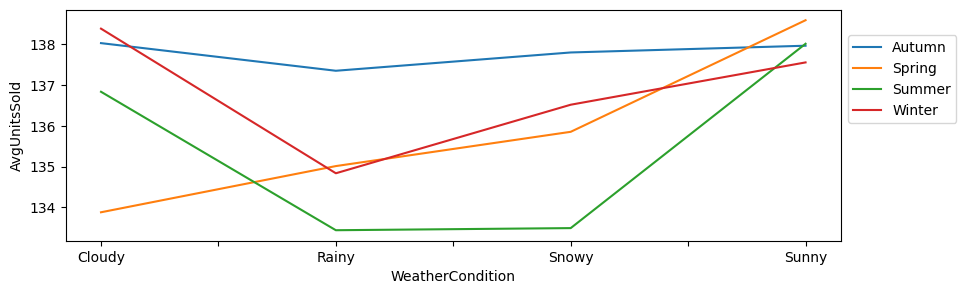

In [ ]:
seasonal_sales_trend.plot(kind = 'line',
                          ylabel='AvgUnitsSold',
                          figsize = (10,3)).legend(loc='center left', bbox_to_anchor = (1.0, 0.7))



---



### What's the highest unit sales for each category in every quarter of the year 2023?

**Hardcoded solution:**

In [ ]:
year_2023 = df[df['SalesYear'] == 2023]   # Creating frame 'year_2023' having all rows for SalesYear = 2023

qtr_list = year_2023['Date'].dt.quarter.unique().tolist()   # [1, 2, 3, 4]
category_name = year_2023['Category'].unique().tolist()     # ['Clothing', 'Toys', 'Groceries', 'Furniture', 'Electronics']

qtr_cat = [(x, y) for x in qtr_list for y in category_name]  # Packing all combos of quarters & categories in a list

for qtr, cat in qtr_cat:  # Iterating over each pair of vals in 'qtr_cat'
  qtr_max_sale = year_2023[(year_2023['Date'].dt.quarter == qtr) & (year_2023['Category'] == cat)].agg({'UnitsSold':'max'})
  print('2023 Qtr:', qtr, ', Max Sales:', qtr_max_sale.iloc[0], 'units, Category:', cat)

2023 Qtr: 1 , Max Sales: 478 units, Category: Clothing
2023 Qtr: 1 , Max Sales: 495 units, Category: Toys
2023 Qtr: 1 , Max Sales: 494 units, Category: Groceries
2023 Qtr: 1 , Max Sales: 488 units, Category: Furniture
2023 Qtr: 1 , Max Sales: 487 units, Category: Electronics
2023 Qtr: 2 , Max Sales: 471 units, Category: Clothing
2023 Qtr: 2 , Max Sales: 488 units, Category: Toys
2023 Qtr: 2 , Max Sales: 488 units, Category: Groceries
2023 Qtr: 2 , Max Sales: 499 units, Category: Furniture
2023 Qtr: 2 , Max Sales: 484 units, Category: Electronics
2023 Qtr: 3 , Max Sales: 475 units, Category: Clothing
2023 Qtr: 3 , Max Sales: 479 units, Category: Toys
2023 Qtr: 3 , Max Sales: 488 units, Category: Groceries
2023 Qtr: 3 , Max Sales: 487 units, Category: Furniture
2023 Qtr: 3 , Max Sales: 484 units, Category: Electronics
2023 Qtr: 4 , Max Sales: 478 units, Category: Clothing
2023 Qtr: 4 , Max Sales: 479 units, Category: Toys
2023 Qtr: 4 , Max Sales: 494 units, Category: Groceries
2023 Qtr: 

**Pandas solution:**

In [ ]:
year_2023 = df[df['SalesYear'] == 2023]
tmp = year_2023.groupby([df['Date'].dt.quarter.rename('Quarter'), 'Category'])['UnitsSold'].max().unstack(level = 1)
tmp

Category,Clothing,Electronics,Furniture,Groceries,Toys
Quarter,,,,,
1,478,487,488,494,495
2,471,484,499,488,488
3,475,484,487,488,479
4,478,481,485,494,479


**Let's plot the trend.**

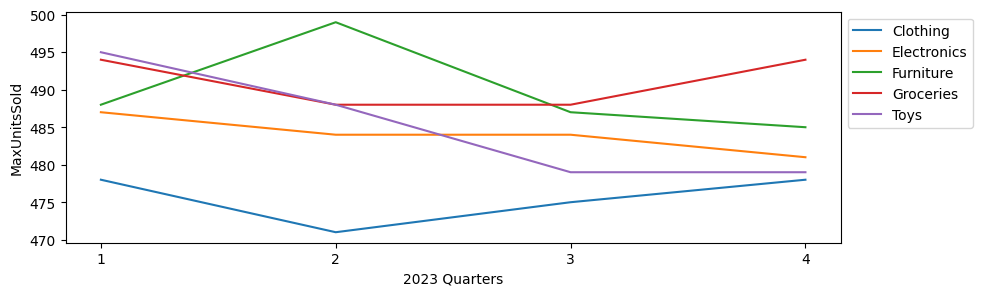

In [ ]:
tmp.plot(kind = 'line',
         xlabel = '2023 Quarters',
         ylabel = 'MaxUnitsSold',
         xticks = [1, 2, 3, 4],
         figsize = (10, 3)).legend(bbox_to_anchor = (1.0, 1.0))

### What's the correlation among product's pricing, competitor pricing & units of products sold?

In [ ]:
# Default 'method' is 'pearson'; needn't use 'method'; other method values are 'spearman' and 'kendall'
df[['Price', 'CompetitorPricing', 'UnitsSold']].corr(method = 'pearson')

,Price,CompetitorPricing,UnitsSold
Price,1.000000,0.993900,0.001082
CompetitorPricing,0.993900,1.000000,0.001259
UnitsSold,0.001082,0.001259,1.000000


### What is the quarterly revenue generated over the years?

**Method-1:**

In [ ]:
def calc_revenue(units, price, discount):      # Fn to calculate revenue
  return units * price * round((1 - discount / 100), 2)

df_tmp = pd.DataFrame()  # Create a temporary frame

# Add columns to frame 'df_tmp'
df_tmp['Year'] = df['Date'].dt.year
df_tmp['Quarters'] = df['Date'].dt.quarter

df_tmp['Revenue'] = calc_revenue(df['UnitsSold'], df['Price'], df['Discount'])

df_tmp.head()

,Year,Quarters,Revenue
1,2022,1,3403.600
2,2022,1,7561.200
3,2022,1,1637.415
4,2022,1,1796.328
5,2022,1,1030.960


In [ ]:
pd.options.display.float_format = '{:.2f}'.format # Comment this line, run cell again; o/p vals will be in scientific notation

df_tmp.groupby(['Year', 'Quarters'])['Revenue'].sum().unstack(level = 1)

Quarters,1,2,3,4
Year,,,,
2022,61503249.18,61838751.91,62978102.36,62134770.88
2023,60897398.27,60970991.95,61749865.01,62270102.60
2024,628142.78,NaN,NaN,NaN


**Method-2** -- **Calling a custom function in** 'aggfunc' **property of** pivot_table()

In [ ]:
def calc_revenue(units, price, discount):
  return units * price * round((1 - discount / 100), 2)

df.pivot_table(index = 'SalesYear',             # ['SalesYear', 'Category'] will yield multi-index o/p
               columns = df['Date'].dt.quarter.rename('Quarters'),
               values = 'UnitsSold',
               aggfunc = lambda x: calc_revenue(x,         # x iterates over each value of 'UnitsSold' in 'values'
                                                df.loc[x.index, 'Price'],
                                                df.loc[x.index, 'Discount']).sum())


Quarters,1,2,3,4
SalesYear,,,,
2022,6.150325e+07,6.183875e+07,6.297810e+07,6.213477e+07
2023,6.089740e+07,6.097099e+07,6.174987e+07,6.227010e+07
2024,6.281428e+05,NaN,NaN,NaN


### What's the category-wise cumulative sales throughout the first 3 quarters of 2022?

**We first calculate the total units sold in each of the 3 quarters and then perform cumulative sum of those totals.**

In [ ]:
qtrs_2022 = df[(df['SalesYear'] == 2022) & (df['Date'].dt.quarter <= 3)]

ans = qtrs_2022.groupby(['Category', df['Date'].dt.quarter.rename('2022_Qtrs')])['UnitsSold'].sum()
ans  # Using 'unstack(level = 1)' here will reshape o/p in wide form

Category     2022_Qtrs
Clothing     1            243057
             2            244291
             3            255613
Electronics  1            244871
             2            236932
             3            251084
Furniture    1            252836
             2            243689
             3            245336
Groceries    1            248828
             2            262110
             3            258347
Toys         1            247471
             2            250666
             3            252774
Name: UnitsSold, dtype: int64

In [ ]:
ans.cumsum().unstack(level = 1)  # Without 'unstack()', o/p is displayed as above o/p but with culumulative totals

2022_Qtrs,1,2,3
Category,,,
Clothing,243057,487348,742961
Electronics,987832,1224764,1475848
Furniture,1728684,1972373,2217709
Groceries,2466537,2728647,2986994
Toys,3234465,3485131,3737905


### Find the region-wise & store-wise distribution of units of products sold in 2023.

In [ ]:
units_sold_2023 = df[df['SalesYear'] == 2023]  # Extracting only rows with SalesYear = 2023

units_sold_2023.pivot_table(index = 'ProductID',
                            columns = ['Region', 'StoreID'],
                            values = 'UnitsSold',
                            aggfunc = 'sum')  # Adding the property 'margins = False' will add a totals col & totals row

Region      East                              North                       \
StoreID     S001   S002   S003   S004   S005   S001   S002   S003   S004   
ProductID                                                                  
P0001      12964  15417  11054  12943  14018  12902  11010  11251  14648   
P0002       9110   9864  12963  13137  15504  10624  11626  13957  11534   
P0003      11781  12980   9508  11976  13811  14774  11903  11013  12809   
P0004      11403  11454  11835  12990  12217  11355  10967  13530  10998   
P0005      11796  12473  12053  13824  14503  11312  11505  11804  12358   
P0006      13337  12405  11871  11120  10636  10952  11389  13941  13486   
P0007      12580  13858  12353  11590  11815  10220  12179  11423  11953   
P0008      11446  12720  13695  14971  13839  13768  11760  12119  10665   
P0009      13400  15472  11527  13388  11652  14242  13967  11960  12287   
P0010      10569  10131  12814  12735  10666  13186  13915  12583  13136   
P0011      12815  12750  14133  10660  11721  13341  11866  14703  15991   
P0012      12495  12085  10508   9380  11762  13007  12379  13043  15573   
P0013      14291  11015  13588  11477  14064  10420  15394  12537  10424   
P0014      11842  13066  12132  12833  10380  12706  13467  12463  12951   
P0015      14441  10916  12954  13323  10358  11975  11267  13422  11363   
P0016      14135  13957  13242  14202  13540  10810  13172  13074  13716   
P0017      13740  11045  13123  12142  15513  10745  12501  13354  13864   
P0018      14141  11839  11430   9486  12623  10849  15726  13302   9071   
P0019      13620  11858  16980  13002  14606  10682  11570   9499  12756   
P0020      13634  14675  13002  12573  12291   8902  14051  11691   9950   

Region            South                               West                \
StoreID     S005   S001   S002   S003   S004   S005   S001   S002   S003   
ProductID                                                                  
P0001       9325  11609  13345  12090   9452  13316  12323  13733  11047   
P0002      12196  12537  13629  13961   9689  12975  10785  12724  12765   
P0003      12073  13132  12155  11940  11193  13093  13113  14591  12718   
P0004      15009  14782  13301  12228   8723  13102  14411  13284  11632   
P0005      12669  13870  12952  10945  14037  12810  11301  11703  14746   
P0006      13926  11306  13136  10747  13031  13838  11280   9574  12442   
P0007      12020  13804  13047  14927  14591  15573  11013  12381  11966   
P0008      12021  11964  12562  12697  12331  13472  12634  11741  10201   
P0009      12123  12066   9924  16663  11396  12025  11485  11694  11791   
P0010      10649  13073  13389  12081   9056  11848  13383  10982  13831   
P0011      10877  10610  11765  11163  11254  15559  13042  15244  12453   
P0012      11428  11754  14267  13425  11175  14353  10233  12812   9685   
P0013      12197  12147  10851  14187  11499  11316  10566  11613  13025   
P0014      11617  13091  10794  14759  12237  14757  13228  11356  13714   
P0015      15029  11878  12984  11612  14007  15897  12528  11978  13696   
P0016      13115  12813  12117  12259  10165  10483  13598  11099  12178   
P0017      11258  16098  13605  13415  10418   9190  12587  10871  11950   
P0018      10703  12739  13577  11941  12993  14889  13774  11307  14096   
P0019      12909  11616  13550  11631  13199  11310  11615  10786  16186   
P0020      13246  14173  13358  12321  11637  13019  12223  11060  12810   

Region                   
StoreID     S004   S005  
ProductID                
P0001      11097  11513  
P0002      10977  10836  
P0003      10628  13587  
P0004      12875  10799  
P0005       8340  11470  
P0006      14923  11485  
P0007       8208   9946  
P0008      11082  10527  
P0009      12668   9645  
P0010      13584  13563  
P0011      12948  12165  
P0012      11609  12714  
P0013      12335  12414  
P0014      13734  11385  
P0015      13764  12082  
P0016      14741  13101  
P0017   

### What's the monthly revenue generated in 2022?

In [ ]:
def calc_revenue(units, price, discount):                # Fn to calculate revenue
  return units * price * round((1 - discount / 100), 2)

# df_2022 = df[df['Date'].dt.year == 2022]
df_2022 = df[df['SalesYear'] == 2022]   # Prev line would do the same filtering as in this one

# Regrouping data by month-end using 'resample()' fn for datetime tasks ('ME' -> month end)

df_2022.resample('ME', on = 'Date')['UnitsSold'].agg(lambda x :                # x iterates over 'UnitsSold' values
                                                     calc_revenue(x,           # Calling 'calc_revenue()' defined above
                                                                  df.loc[x.index, 'Price'],
                                                                  df.loc[x.index, 'Discount']
                                                                  ).sum()
                                                    ).rename('MonthlyRevenue') # Giving contextually better name to col



,MonthlyRevenue
Date,
2022-01-31,20919532.62
2022-02-28,19061033.49
2022-03-31,21522683.07
2022-04-30,20314402.68
2022-05-31,20542562.41
2022-06-30,20981786.82
2022-07-31,21293910.20
2022-08-31,21055281.19
2022-09-30,20628910.98


### Find out which store is generating the highest revenue in each region in 2023. Also, identify the product category in which those stores have made highest-sales in those regions in 2023.

**We'll handle this one in two parts.**

####**Part-1:** Store generating the highest revenue in each region in 2023

In [ ]:
df_copy = df.copy(deep = True)     # Creating copy of 'df' to let original data remain unaffected
df_copy = df_copy[df_copy['SalesYear'] == 2023]   # Filtering rows in 'df_copy' where 'SalesYear = 2023'

**DEEP COPY:** ```deep = True``` (default) ```df's data & indices are copied. Changes to data/indices of 'df_copy' don't affect 'df'.```

**SHALLOW COPY:** ```'deep = False'``` --> ```'df_copy' won't contain df's data/index (only ref. to data & index are copied). Changes to 'df_copy' WILL change 'df', and vice versa.```

In [ ]:
# pd.options.display.float_format = '{:.2f}'.format  # if o/p somewhere has numeric vals in scientific notation, uncomment & run this line

**Calculating the revenue for each transaction:**

In [ ]:
def calc_revenue(units, price, discount):                # Fn to calculate revenue
  return units * price * round((1 - discount / 100), 2)

rows_count = df_copy.shape[0]  # 36500 (rows having SalesYear = 2023)

df_copy['Revenue'] = [0.00 for _ in range(1, rows_count + 1)]  # Creating 'Revenue' col

df_copy['Revenue'] = df_copy['Revenue'].agg(lambda x: calc_revenue(df.loc[x.index, 'UnitsSold'],
                                                                   df.loc[x.index,'Price'],
                                                                   df.loc[x.index, 'Discount']
                                                                  )  # 'calc_revenue()' ends
                                           )  # 'agg()' ends
df_copy['Revenue'].head(5)

,Revenue
36501,7923.01
36502,5093.82
36503,10291.05
36504,279.27
36505,1057.70


**Store with highest revenue in each region:**

In [ ]:
max_rev_stores = df_copy.groupby(['Region', 'StoreID'])['Revenue'].sum()
max_rev_stores

Region  StoreID
East    S001      12299177.51
        S002      12605371.79
        S003      12640728.39
        S004      12320148.11
        S005      12857667.65
North   S001      11659157.85
        S002      12720510.37
        S003      11978645.08
        S004      12607446.46
        S005      11851253.38
South   S001      12650598.81
        S002      12550286.00
        S003      12468386.72
        S004      11295096.05
        S005      13276233.58
West    S001      12173206.69
        S002      11962442.39
        S003      12512989.52
        S004      12013375.99
        S005      11445635.52
Name: Revenue, dtype: float64

In [ ]:
max_rev_stores = max_rev_stores.reset_index()
max_rev_stores

,Region,StoreID,Revenue
0,East,S001,12299177.51
1,East,S002,12605371.79
2,East,S003,12640728.39
3,East,S004,12320148.11
4,East,S005,12857667.65
5,North,S001,11659157.85
6,North,S002,12720510.37
7,North,S003,11978645.08
8,North,S004,12607446.46
9,North,S005,11851253.38


In [ ]:
# 'idxmax()' returns index of row having highest val for 'Revenue' (look at index col in o/p)

max_rev_stores.loc[max_rev_stores.groupby('Region')['Revenue'].idxmax()]

,Region,StoreID,Revenue
4,East,S005,12857667.65
6,North,S002,12720510.37
14,South,S005,13276233.58
17,West,S003,12512989.52


**Complete logic at one place:**

In [ ]:
# def calc_revenue(units, price, discount):                # Fn to calculate revenue
#   return units * price * round((1 - discount / 100), 2)

# df_copy = df.copy(deep = True)
# df_copy = df_copy[df_copy['SalesYear'] == 2023]

# rows_count = df_copy.shape[0]  # 36500 (rows having SalesYear = 2023)
# df_copy['Revenue'] = [0.00 for _ in range(1, rows_count + 1)]  # Creating 'Revenue' col

# df_copy['Revenue'] = df_copy['Revenue'].agg(lambda x: calc_revenue(df.loc[x.index, 'UnitsSold'],
#                                                                    df.loc[x.index,'Price'],
#                                                                    df.loc[x.index, 'Discount']))

# max_rev_stores = df_copy.groupby(['Region', 'StoreID'])['Revenue'].sum().reset_index()
# max_rev_stores.loc[max_rev_stores.groupby('Region')['Revenue'].idxmax()]

,Region,StoreID,Revenue
4,East,S005,12857667.65
6,North,S002,12720510.37
14,South,S005,13276233.58
17,West,S003,12512989.52


#### **PART-2:** Identifying the product category in which the above listed stores have made highest-sales in their regions in 2023

In other words, we've to find the product categories that had highest unit sales at stores S002, S003 & S005 in all regions in 2023.

In [ ]:
# Filter data for the year 2023 and specified stores

stores_2023 = df[(df['SalesYear'] == 2023) & (df['StoreID'].isin(['S002', 'S003', 'S005']))]
stores_2023.head(3)

,Date,SalesYear,SalesMonth,StoreID,ProductID,Category,Region,InventoryLevel,UnitsSold,UnitsOrdered,DemandForecast,Price,Discount,WeatherCondition,HolidayPromotion,CompetitorPricing,Seasonality
36521,2023-01-01,2023,January,S002,P0001,Toys,West,104,11,110,25.40,55.88,15,Snowy,YES,58.93,Winter
36522,2023-01-01,2023,January,S002,P0002,Furniture,South,367,298,105,311.03,20.23,0,Rainy,YES,15.32,Autumn
36523,2023-01-01,2023,January,S002,P0003,Clothing,South,405,159,76,154.31,50.07,10,Rainy,NO,52.54,Summer


In [ ]:
# Group by region, store, and category, then sum units sold

sales_cat = stores_2023.groupby(['Region', 'StoreID', 'Category'])['UnitsSold'].sum().rename('TotalUnitSales').reset_index()
sales_cat.head(4)

,Region,StoreID,Category,TotalUnitSales
0,East,S002,Clothing,48562
1,East,S002,Electronics,48536
2,East,S002,Furniture,53384
3,East,S002,Groceries,53195


In [ ]:
# Category with the highest unit sales for the 3 stores in each region

max_sales_cat = sales_cat.loc[sales_cat.groupby(['Region', 'StoreID'])['TotalUnitSales'].idxmax()]
max_sales_cat.set_index(['Region', 'StoreID'], inplace = True)
max_sales_cat

Category  TotalUnitSales
Region StoreID                             
East   S002       Furniture           53384
       S003     Electronics           51513
       S005       Furniture           55967
North  S002            Toys           53765
       S003     Electronics           54791
       S005     Electronics           51862
South  S002        Clothing           56107
       S003       Furniture           55414
       S005            Toys           57241
West   S002        Clothing           52489
       S003       Furniture           56629
       S005            Toys           49087

### What are the top-3 products (i.e prodcut IDs) sold in each region in the years 2022 and 2023?

**There are two years, and four regions. Each region is to have its top-3 products. So, final output shall have 24 non-NaN records.**

####**METHOD-1:** Using 'nlargest()'

In [4]:
sales_2022_2023 = df[df['SalesYear'].isin([2022, 2023])]

product_sales = sales_2022_2023.groupby(['SalesYear', 'Region', 'ProductID'])['UnitsSold'].sum().reset_index()
product_sales

,SalesYear,Region,ProductID,UnitsSold
0,2022,East,P0001,67133
1,2022,East,P0002,61934
2,2022,East,P0003,59874
3,2022,East,P0004,64494
4,2022,East,P0005,66364
...,...,...,...,...
155,2023,West,P0016,64717
156,2023,West,P0017,62153
157,2023,West,P0018,66504
158,2023,West,P0019,59588


In [12]:
# Top 3 products in each region for each year
top_3_products = product_sales.groupby(['SalesYear', 'Region'])['UnitsSold'].apply(lambda x: x.nlargest(3))
top_3_products.reset_index()

,SalesYear,Region,level_2,UnitsSold
0,2022,East,14,69326
1,2022,East,0,67133
2,2022,East,4,66364
3,2022,North,39,66949
4,2022,North,21,66808
5,2022,North,36,65556
6,2022,South,52,66451
7,2022,South,42,65157
8,2022,South,40,64695
9,2022,West,68,67029


####**METHOD-2:** Using 'head()'

In [ ]:
# df_2022_23 = df[df['SalesYear'].isin([2022, 2023])]

# product_sales = df_2022_23.groupby(['SalesYear', 'Region', 'ProductID'])['UnitsSold'].sum().reset_index()
# product_sales = product_sales.sort_values(['SalesYear', 'Region', 'UnitsSold'], ascending = [True, True, False])

# product_sales = product_sales.groupby(['SalesYear', 'Region']).head(3)  # EXTRACTING TOP-3 ROWS IN EACH GROUP
# product_sales.reset_index(drop = True)

**Here goes the line by line run of the above logic:**

In [13]:
df_2022_23 = df[df['SalesYear'].isin([2022, 2023])]

product_sales = df_2022_23.groupby(['SalesYear', 'Region', 'ProductID'])['UnitsSold'].sum().reset_index()
product_sales

,SalesYear,Region,ProductID,UnitsSold
0,2022,East,P0001,67133
1,2022,East,P0002,61934
2,2022,East,P0003,59874
3,2022,East,P0004,64494
4,2022,East,P0005,66364
...,...,...,...,...
155,2023,West,P0016,64717
156,2023,West,P0017,62153
157,2023,West,P0018,66504
158,2023,West,P0019,59588


In [14]:
# Sorting the above output

product_sales = product_sales.sort_values(['SalesYear', 'Region', 'UnitsSold'], ascending = [True, True, False])
product_sales

,SalesYear,Region,ProductID,UnitsSold
14,2022,East,P0015,69326
0,2022,East,P0001,67133
4,2022,East,P0005,66364
13,2022,East,P0014,65817
12,2022,East,P0013,65376
...,...,...,...,...
144,2023,West,P0005,57560
148,2023,West,P0009,57283
151,2023,West,P0012,57053
147,2023,West,P0008,56185


In [15]:
# Grouping above o/p by 'SalesYear' and 'Region'

product_sales = product_sales.groupby(['SalesYear', 'Region']).head(3)  # EXTRACTING TOP-3 ROWS IN EACH GROUP
product_sales.reset_index(drop = True)

,SalesYear,Region,ProductID,UnitsSold
0,2022,East,P0015,69326
1,2022,East,P0001,67133
2,2022,East,P0005,66364
3,2022,North,P0020,66949
4,2022,North,P0002,66808
5,2022,North,P0017,65556
6,2022,South,P0013,66451
7,2022,South,P0003,65157
8,2022,South,P0001,64695
9,2022,West,P0009,67029




---



**```Checking if an o/p is a Series obj or DataFrame obj using 'isinstance()' fn```**

```isinstance(product_sales, pd.DataFrame) # True```

```isinstance(product_sales, pd.Series)    # False```



---



### Next question here...

*Keeping all data loading & transformation code in one cell for quick reloading in case of abrupt Colab session termination:*

In [1]:
# import pandas as pd

# # Loading the data's copy from local machine instead of from Kaggle
# df = pd.read_csv('/content/retail_store_inventory.csv')

# df.index = df.index + 1  # Resetting index to begin from 1

# df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')  # Changing 'Date' col's dtype to datetime

# df['SalesYear'] = df['Date'].dt.year             # Adding col for year
# df['SalesMonth'] = df['Date'].dt.month_name()    # Adding col for month's name

# # Shifting newly added 'SalesYear' & 'SalesMonth' columns beside the 'Date' col
# cols = df.columns.tolist()
# cols = [cols[0], *cols[-2:], *cols[1:-2]]  # Creating new cols list by using cols' position
# df = df[cols]

# df.columns = [col.replace(' ','') for col in df.columns]  # Removing spaces & '/' in column names
# df.rename(columns = {'Holiday/Promotion': 'HolidayPromotion'}, inplace=True)

# df['HolidayPromotion'] = df['HolidayPromotion'].replace({0: 'NO', 1: 'YES'}) # Replacing vals in col 'HolidayPromotion'

In [ ]:
# df.to_csv('retail_store_inventory_cleaned.csv', index = False)  # saving a copy of cleaned & transformed df as .csv